# Table of Contents
 

In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [53]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(path1):
    #data import
    data = pd.read_csv(path1, header=None).values
    amp = data[:,1:91]

    #plt
    fig = plt.figure(figsize = (18,10))
    ax1 = plt.subplot(311)
    plt.imshow(amp[:,0:29].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    ax1.set_title("Antenna1 Amplitude")
    plt.colorbar()

    ax2 = plt.subplot(312)
    plt.imshow(amp[:,30:59].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    ax2.set_title("Antenna2 Amplitude")
    plt.colorbar()

    ax3 = plt.subplot(313)
    plt.imshow(amp[:,60:89].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    ax3.set_title("Antenna3 Amplitude")
    plt.colorbar()
    plt.show()
    
    # Initializing valiables
    constant_offset = np.empty_like(amp)
    filtered_data = np.empty_like(amp)

    # Calculating the constant offset (moving average 4 seconds)
    for i in range(1, len(amp[0])):
        constant_offset[:,i] = moving_average(amp[:,i], 4000)

    # Calculating the filtered data (substract the constant offset)
    filtered_data = amp - constant_offset

    # Smoothing (moving average 0.01 seconds)
    for i in range(1, len(amp[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    # Calculate correlation matrix (90 * 90 dim)
    cov_mat2 = np.cov(filtered_data.T)
    # Calculate eig_val & eig_vec
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)
    # Sort the eig_val & eig_vec
    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]
    # Calculate H * eig_vec
    pca_data2 = filtered_data.dot(eig_vec2)
    
    xmin = 0
    xmax = 20000
    # plt
    fig3 = plt.figure(figsize = (18,20))

    ax1 = plt.subplot(611)
    plt.plot(pca_data2[xmin:xmax,0])
    #plt.plot(pca_data2[2500:17500,0])
    ax1.set_title("PCA 1st component")

    ax2 = plt.subplot(612)
    plt.plot(pca_data2[xmin:xmax,1])
    #plt.plot(pca_data2[2500:17500,1])
    ax2.set_title("PCA 2nd component")

    ax3 = plt.subplot(613)
    plt.plot(pca_data2[xmin:xmax,2])
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 3rd component")

    ax4 = plt.subplot(614)
    plt.plot(pca_data2[xmin:xmax,3])
    #plt.plot(pca_data2[2500:17500,3])
    ax4.set_title("PCA 4th component")

    ax5 = plt.subplot(615)
    plt.plot(pca_data2[xmin:xmax,4])
    #plt.plot(pca_data2[2500:17500,4])
    ax5.set_title("PCA 5th component")

    ax6 = plt.subplot(616)
    plt.plot(pca_data2[xmin:xmax,5])
    #plt.plot(pca_data2[2500:17500,5])
    ax6.set_title("PCA 6th component")

    plt.show()
    
    plt.figure(figsize = (18,30))
    # Spectrogram(STFT)
    plt.subplot(611)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,0], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(612)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,1], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(613)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,2], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(614)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,3], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(615)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,4], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.subplot(616)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,5], NFFT=256, Fs=1000, noverlap=64, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.show()
    
    plt.figure(figsize = (18,10))
    ax = plt.subplot(111)
#    ax.magnitude_spectrum(pca_data2[:,0], Fs=1000, scale='dB', color='C1')
    ax.magnitude_spectrum(pca_data2[:,0], Fs=10000, color='C1')
    plt.xlim(0,100)
    plt.ylim(0,10)
    plt.show()

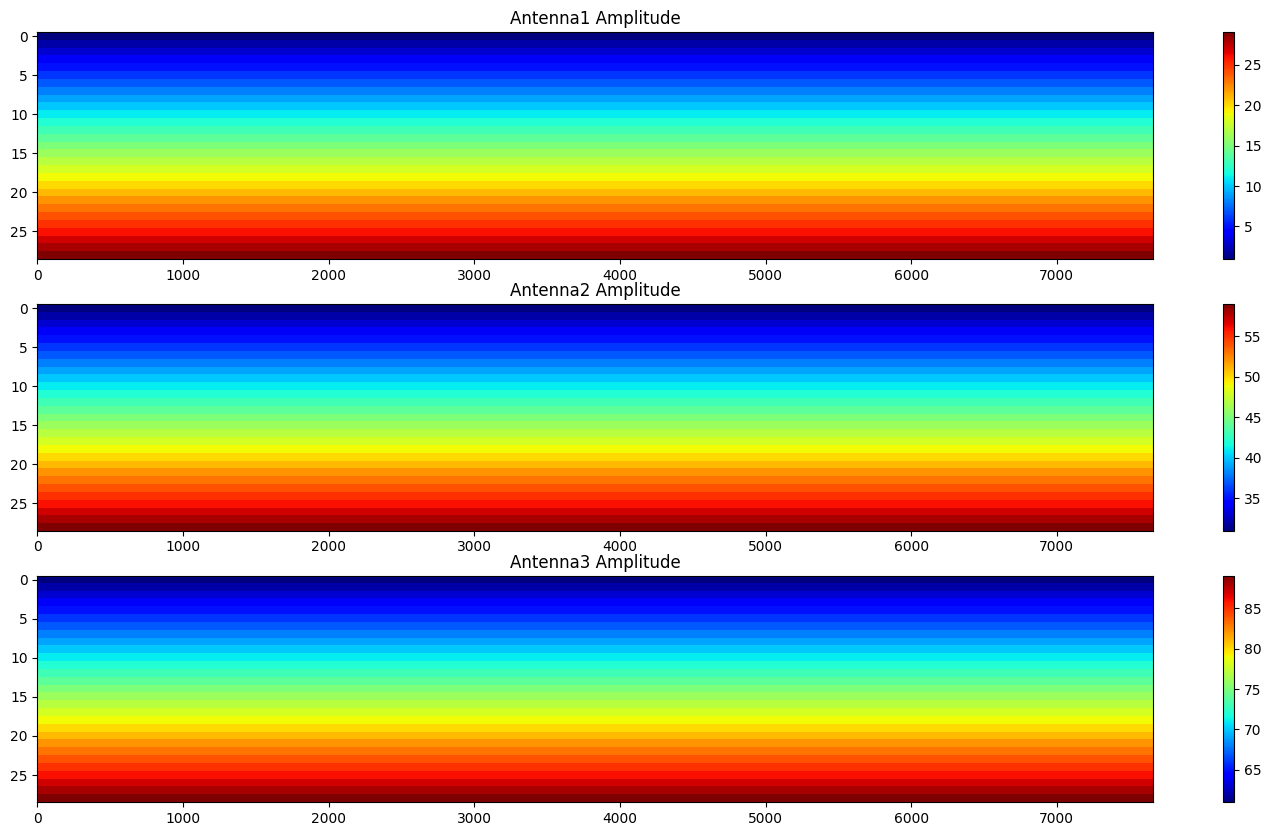

e:\Wifi_based_HAR\venv\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
e:\Wifi_based_HAR\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


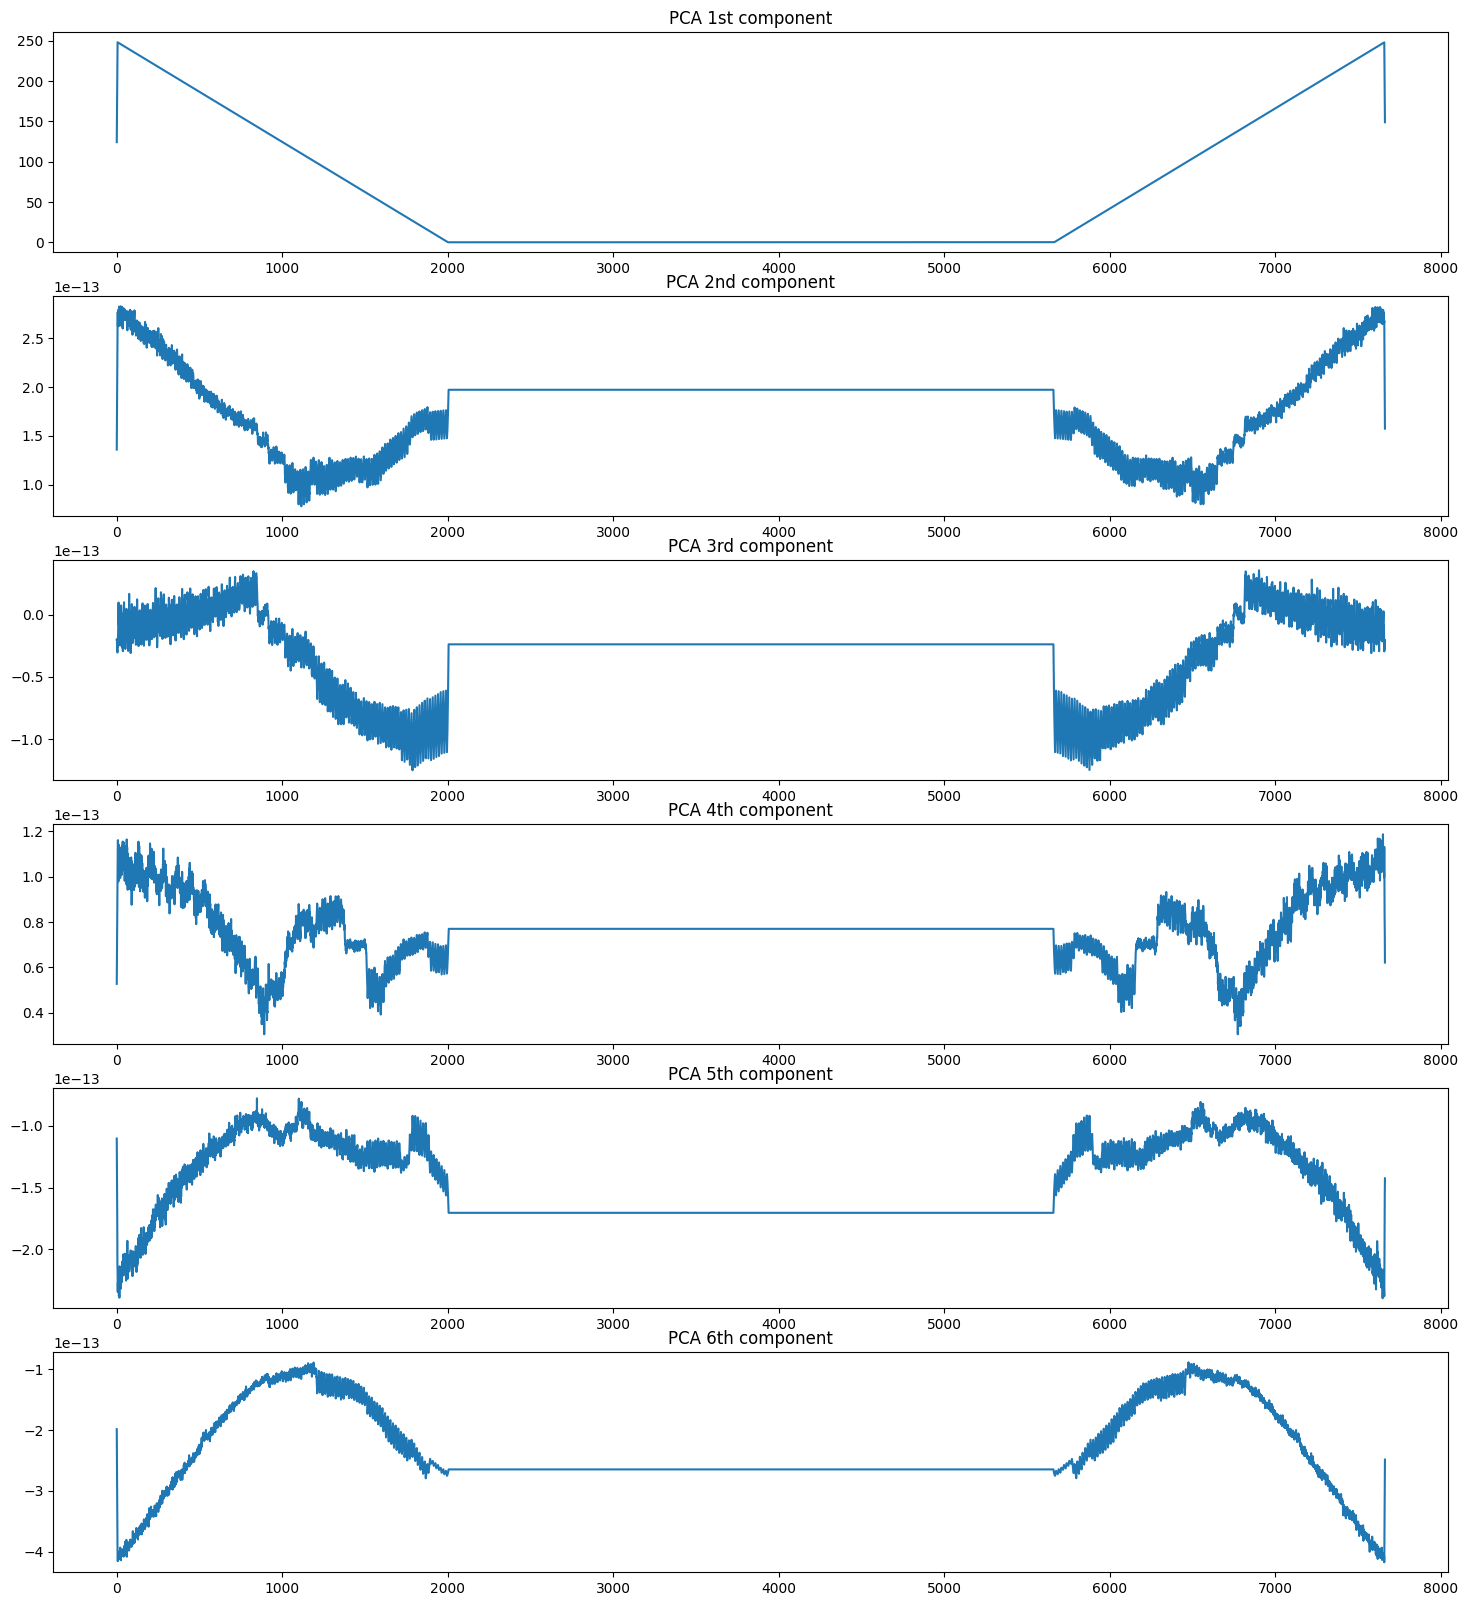

e:\Wifi_based_HAR\venv\Lib\site-packages\matplotlib\axes\_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


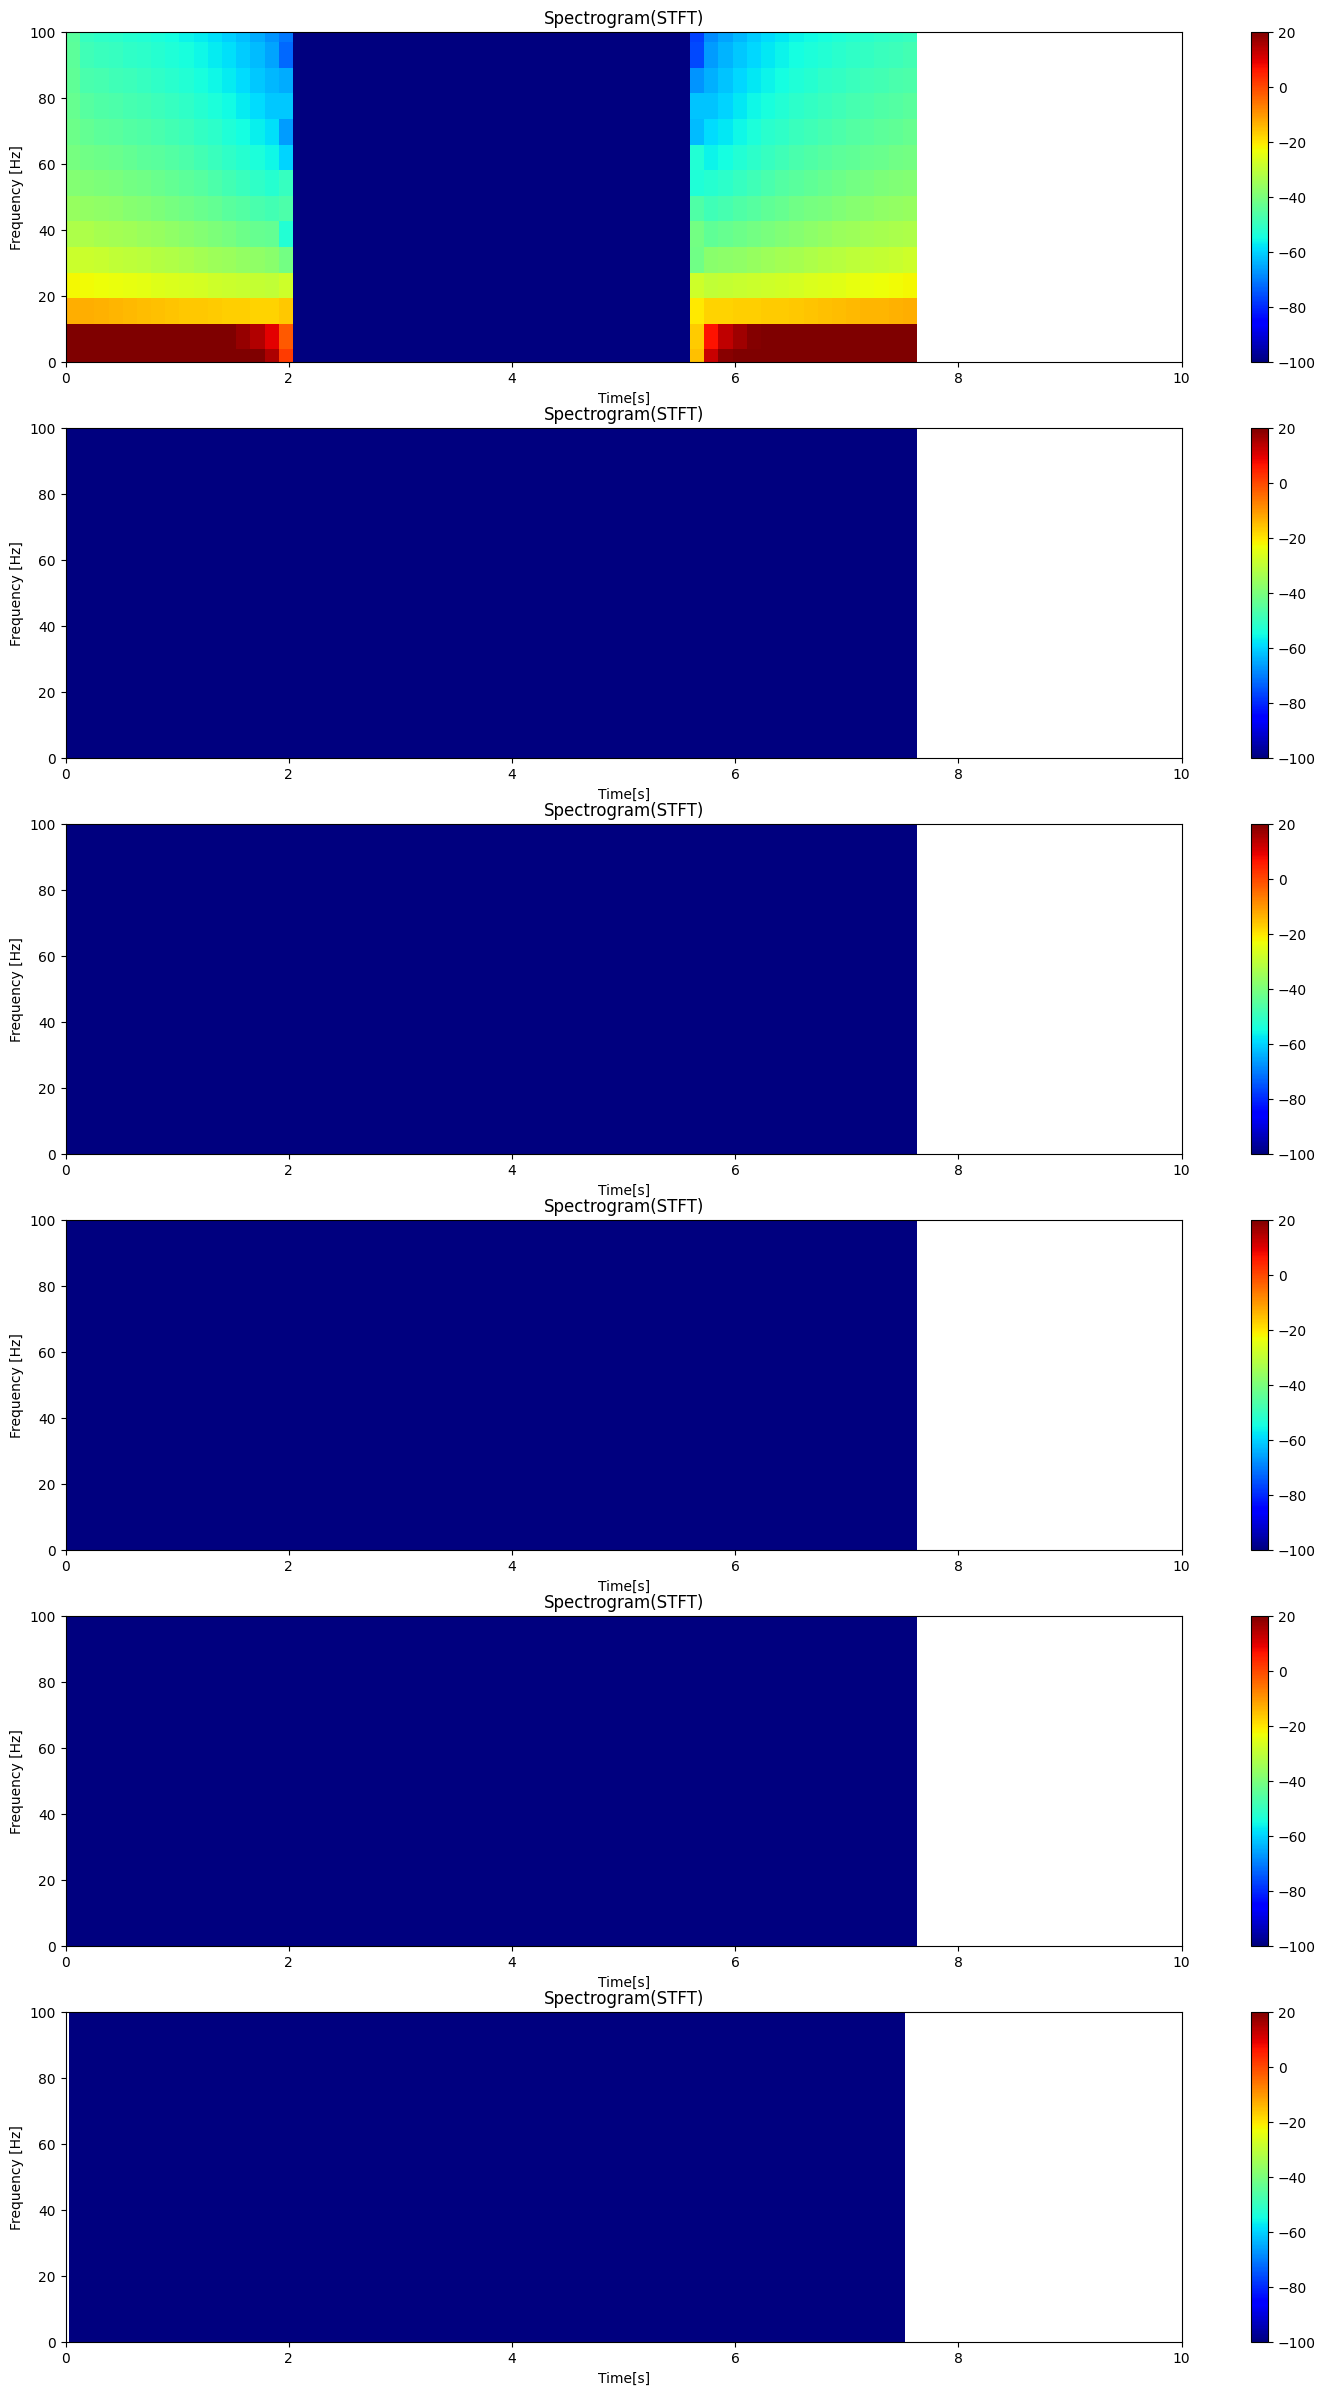

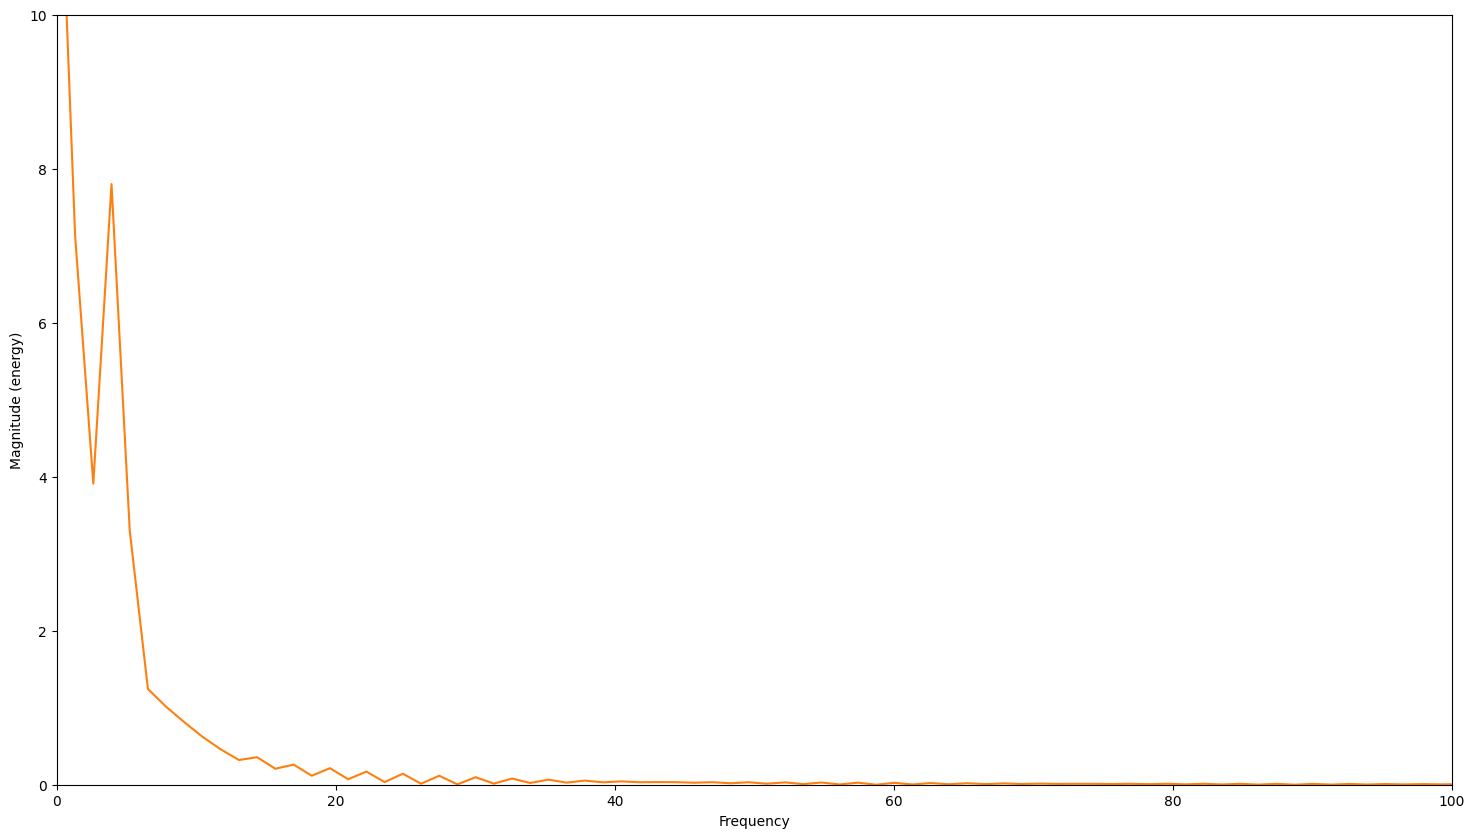

In [54]:
visualize(path1= "E:\\Wifi_based_HAR\\dataset\\bedroom_lviv\\4\\data.csv")

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def moving_average(data, window_size):
    """Compute the moving average using a centered rolling window."""
    return pd.Series(data).rolling(window=window_size, center=True).mean().fillna(0).to_numpy()

def visualize(file_path):
    # Data import
    data = pd.read_csv(file_path, header=None).values
    amp = data[:, 1:91]

    # Plot Antenna Amplitudes
    fig, axes = plt.subplots(3, 1, figsize=(18, 10))
    for i, ax in enumerate(axes):
        ax.imshow(amp[:, i * 30:(i + 1) * 30].T, interpolation="nearest", aspect="auto", cmap="jet")
        ax.set_title(f"Antenna {i + 1} Amplitude")
        plt.colorbar(ax.images[0], ax=ax)
    plt.show()

    # Compute Constant Offset (Moving Average 4 Seconds)
    constant_offset = np.apply_along_axis(moving_average, axis=0, arr=amp, window_size=4000)

    # Filtered Data Calculation and Smoothing (Moving Average 0.01 Seconds)
    filtered_data = amp - constant_offset
    filtered_data = np.apply_along_axis(moving_average, axis=0, arr=filtered_data, window_size=10 )

    # PCA Transformation
    pca = PCA(n_components=6)
    pca_data = pca.fit_transform(filtered_data)

    # Plot PCA Components
    fig, axes = plt.subplots(6, 1, figsize=(18, 20))
    for i in range(6):
        axes[i].plot(pca_data[:, i])
        axes[i].set_title(f"PCA {i + 1} Component")
    plt.show()

    # Spectrogram (STFT) Visualization
    fig, axes = plt.subplots(6, 1, figsize=(18, 30))
    eps = 1e-10
    for i in range(6):
        signal_no_dc = pca_data[:, 0] - np.mean(pca_data[:, 0])
        Pxx, freqs, bins, im = axes[i].specgram(
            signal_no_dc, NFFT=128, Fs=1000, noverlap=64, cmap="jet", vmin=-100, vmax=20
        )
        axes[i].set_xlabel("Time [s]")
        axes[i].set_ylabel("Frequency [Hz]")
        axes[i].set_title(f"Spectrogram (PCA {i + 1} Component)")
        fig.colorbar(im, ax=axes[i])
        axes[i].set_xlim(0, 10)
        axes[i].set_ylim(0, 100)
    plt.show()

    # Magnitude Spectrum of PCA 1st Component
    plt.figure(figsize=(18, 10))
    plt.magnitude_spectrum(pca_data[:, 0], Fs=1000, color='C1')
    plt.xlim(0, 100)
    plt.ylim(0, 10)
    plt.title("Magnitude Spectrum (PCA 1st Component)")
    plt.show()


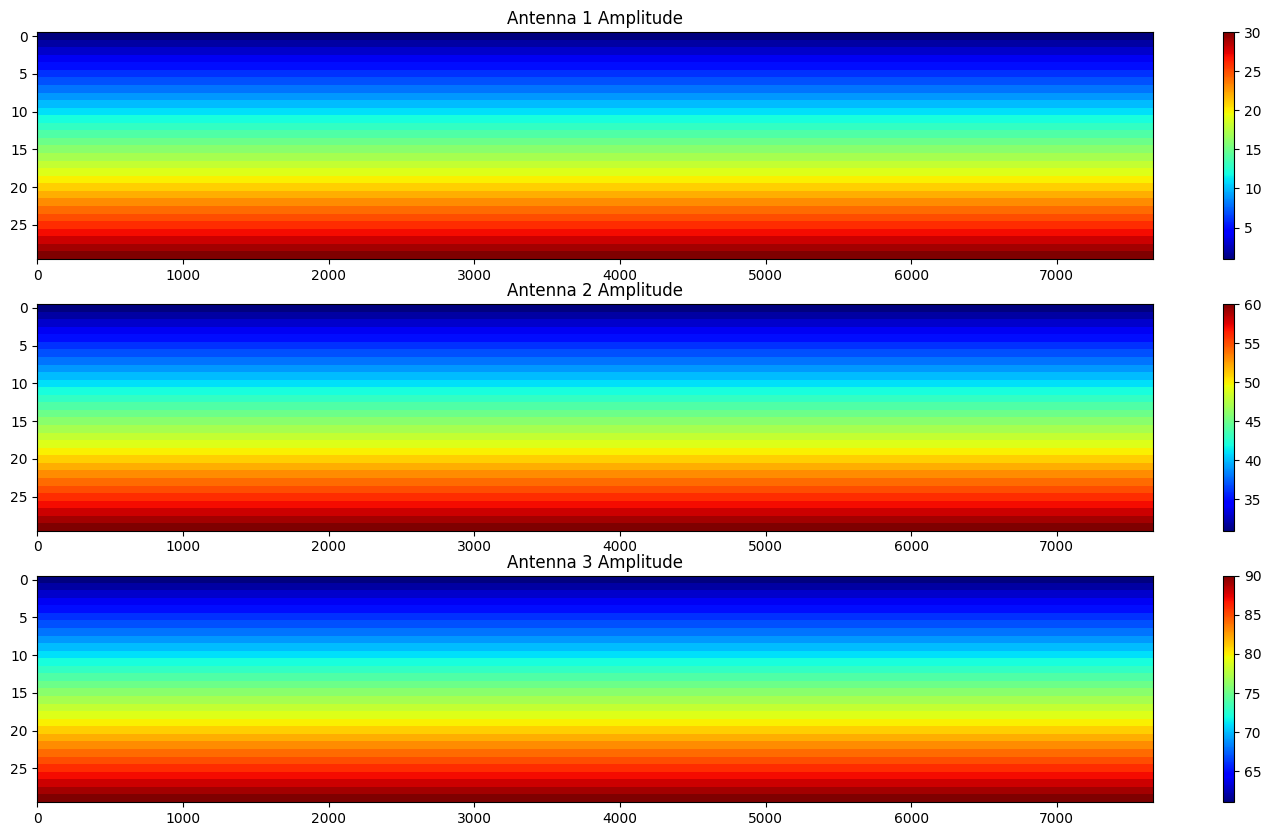

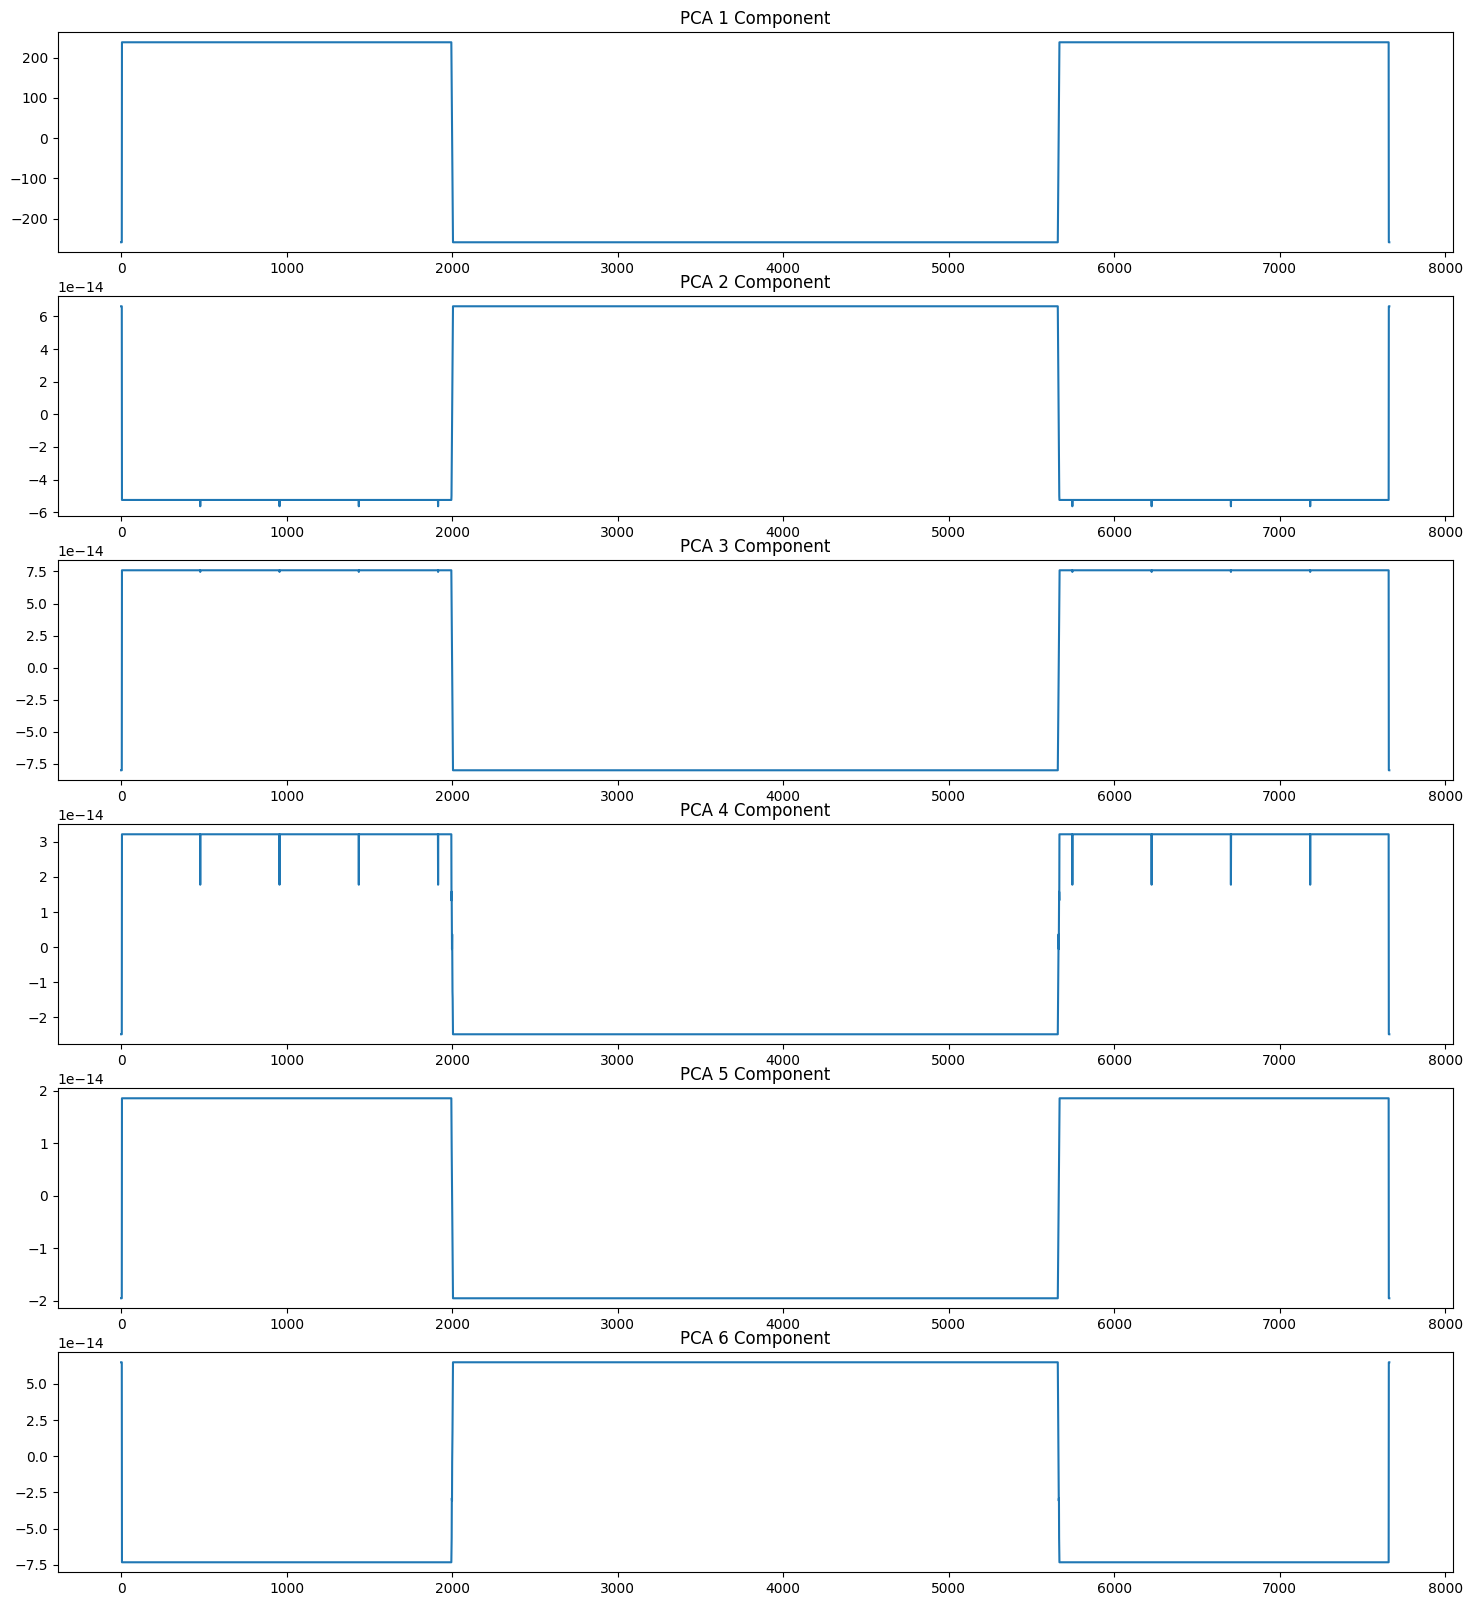

e:\Wifi_based_HAR\venv\Lib\site-packages\matplotlib\axes\_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


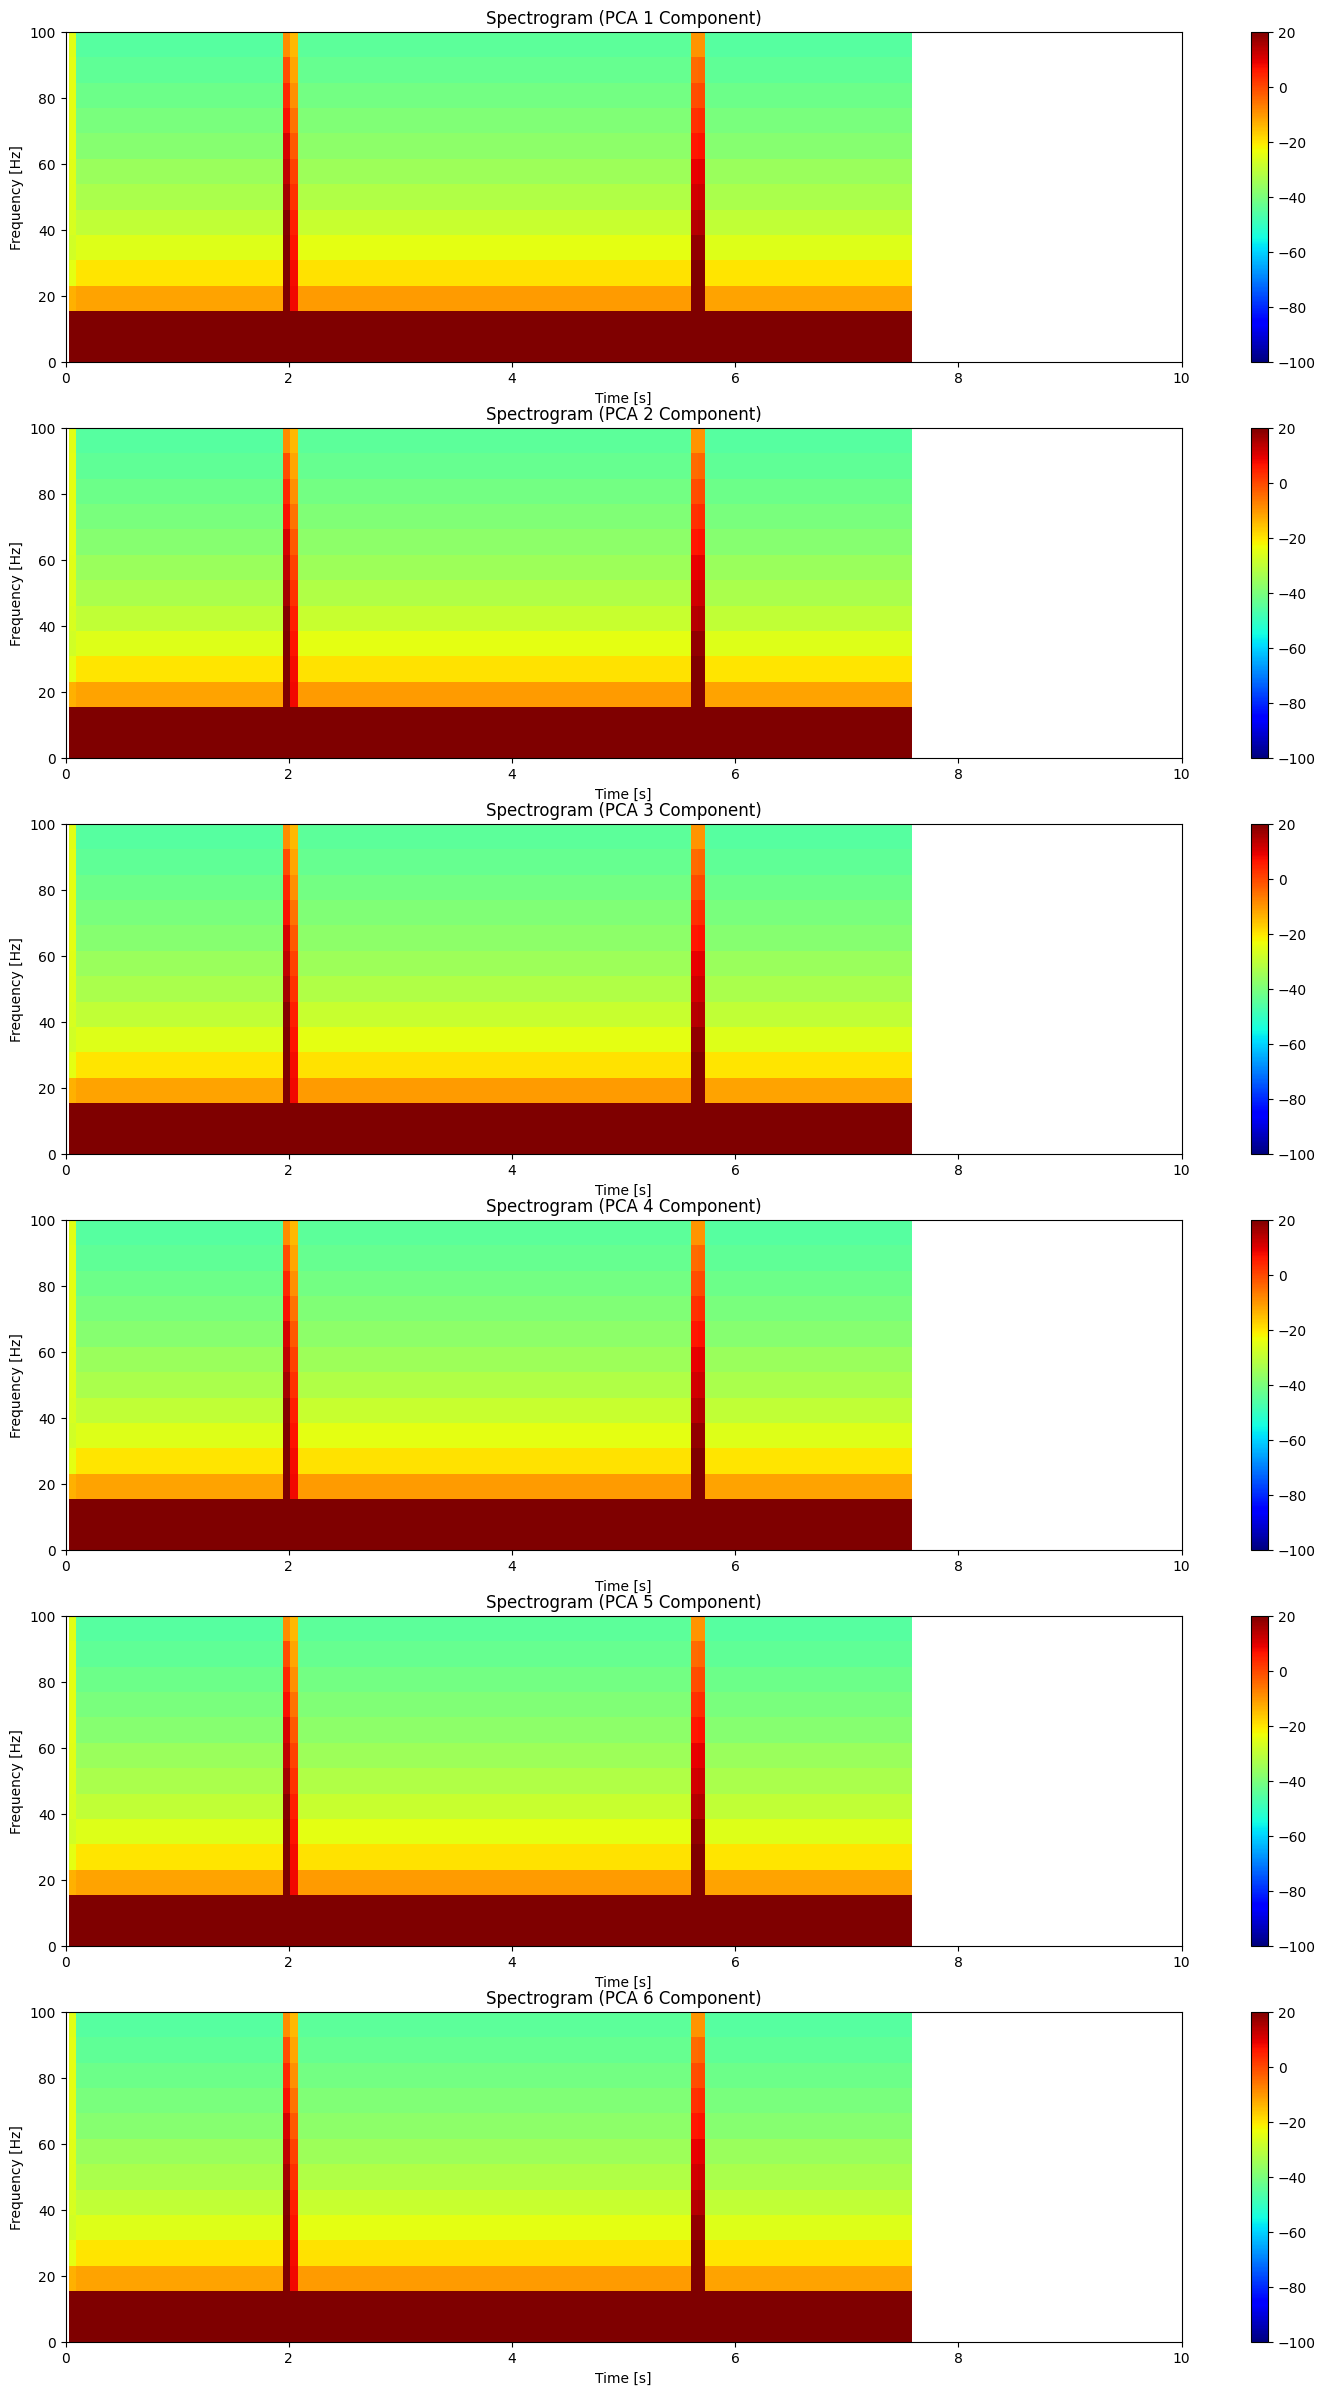

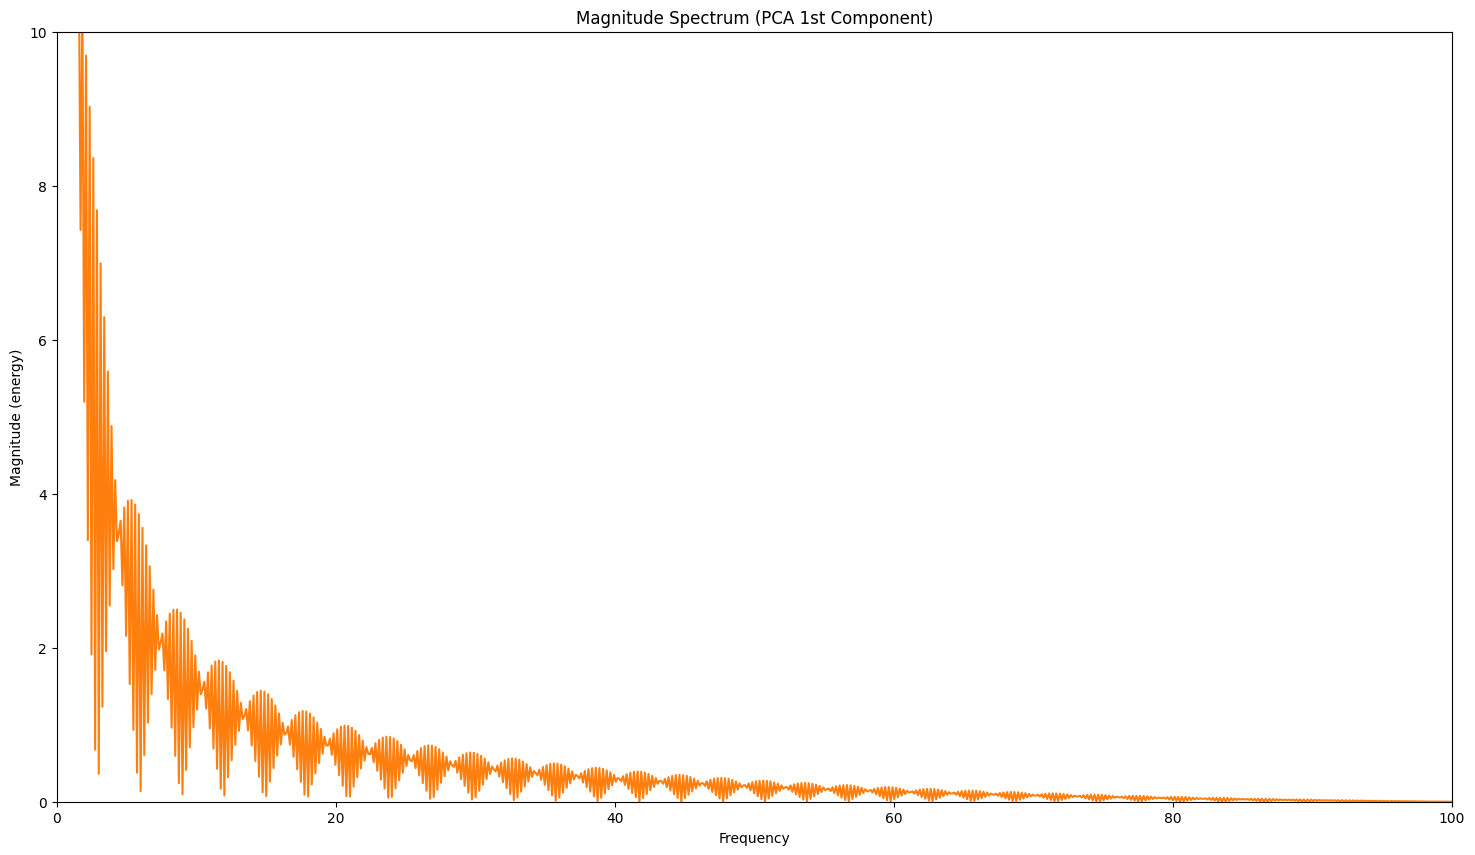

In [70]:
visualize(file_path= "E:\\Wifi_based_HAR\\dataset\\bedroom_lviv\\4\\data.csv")

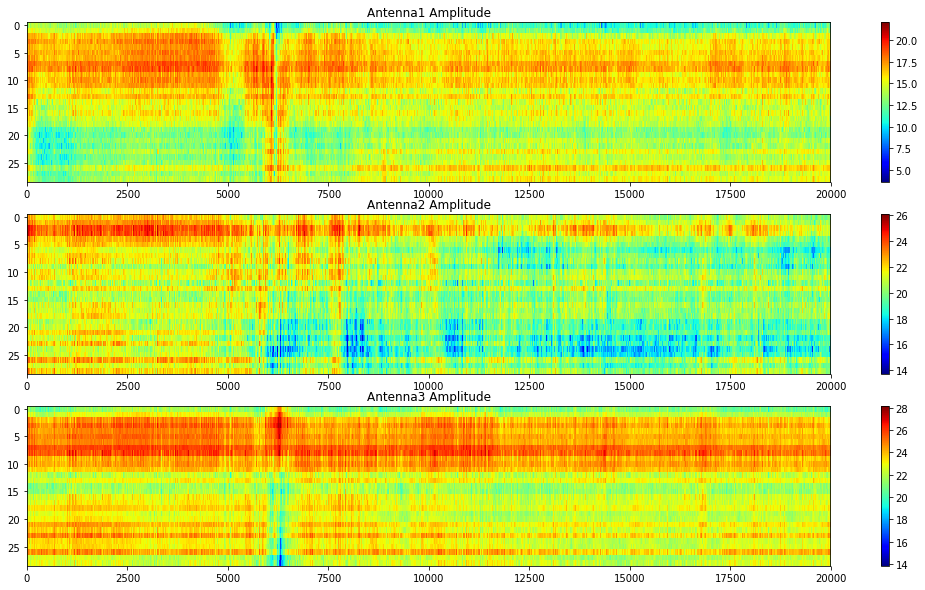

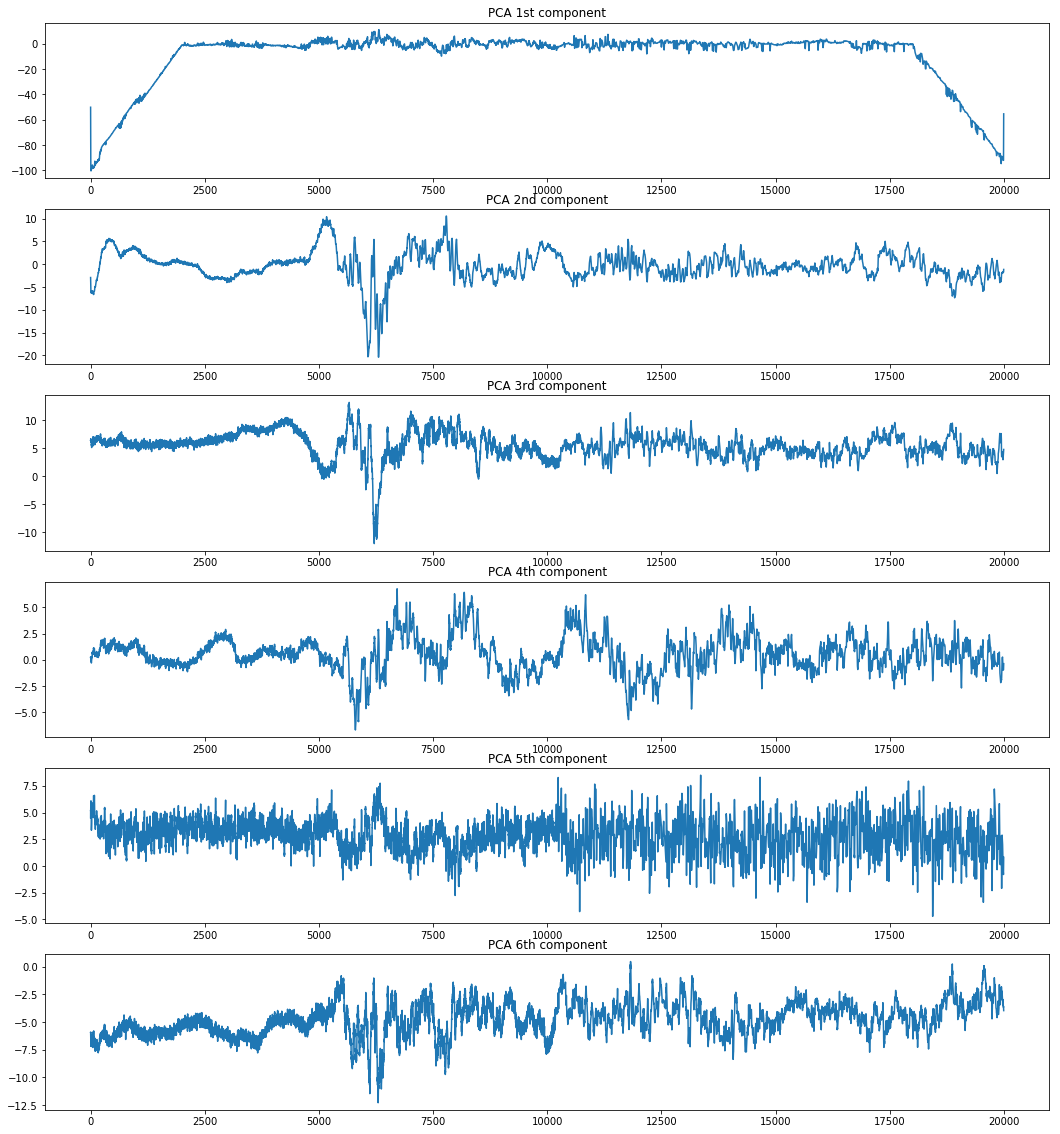

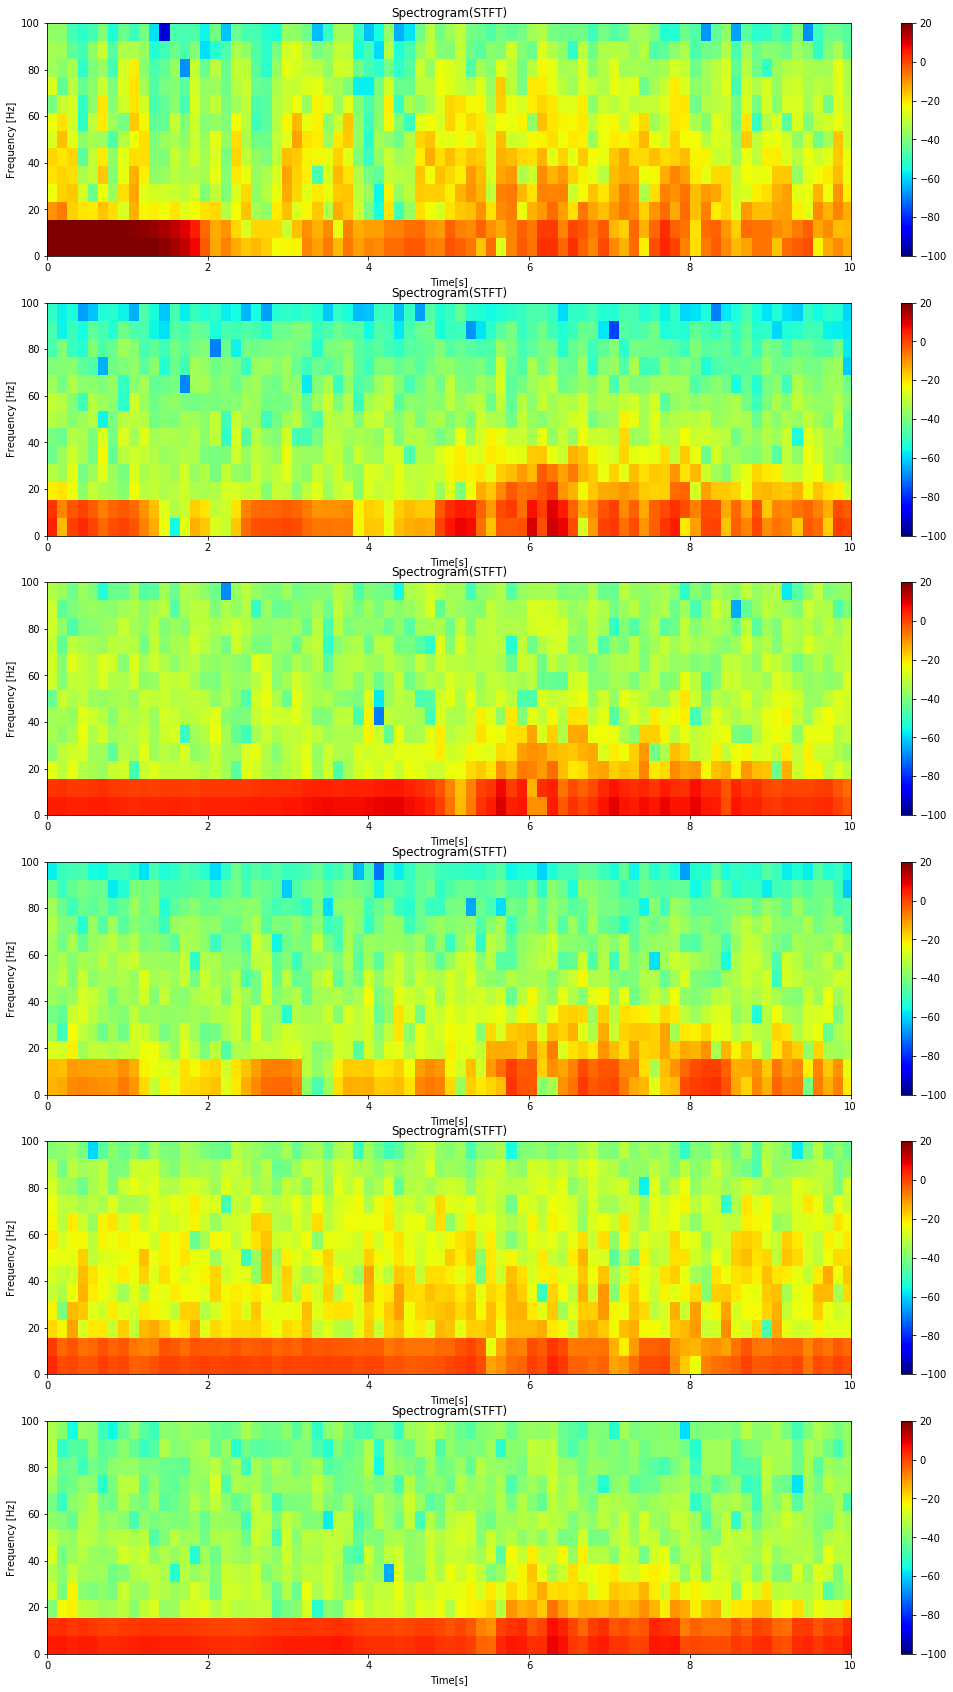

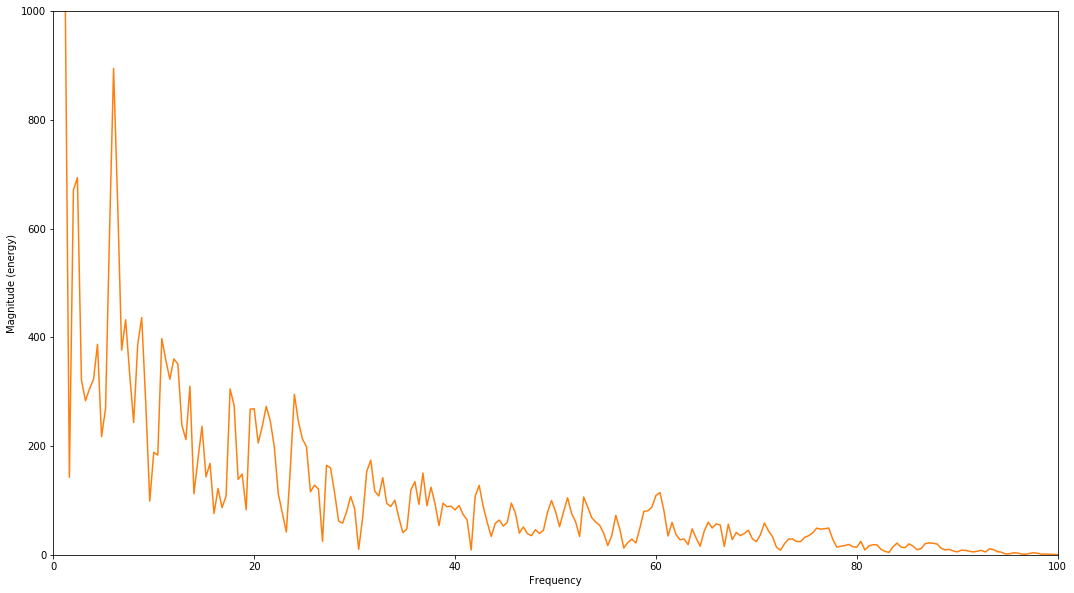

In [50]:
visualize(path1 = "170401_activity_data_UABC_L2_building_2_LOS\Input\input_fall_170314_0914_02.csv")

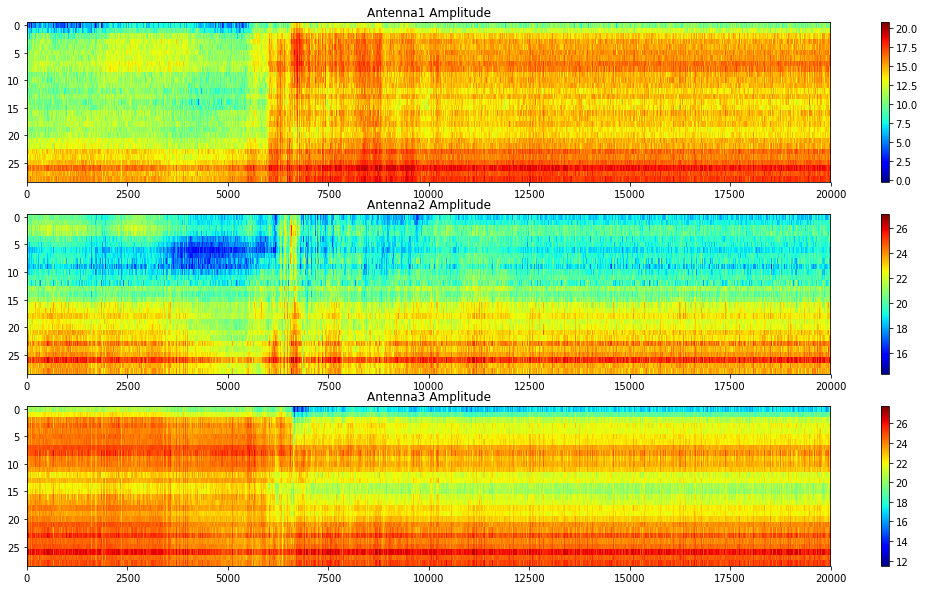

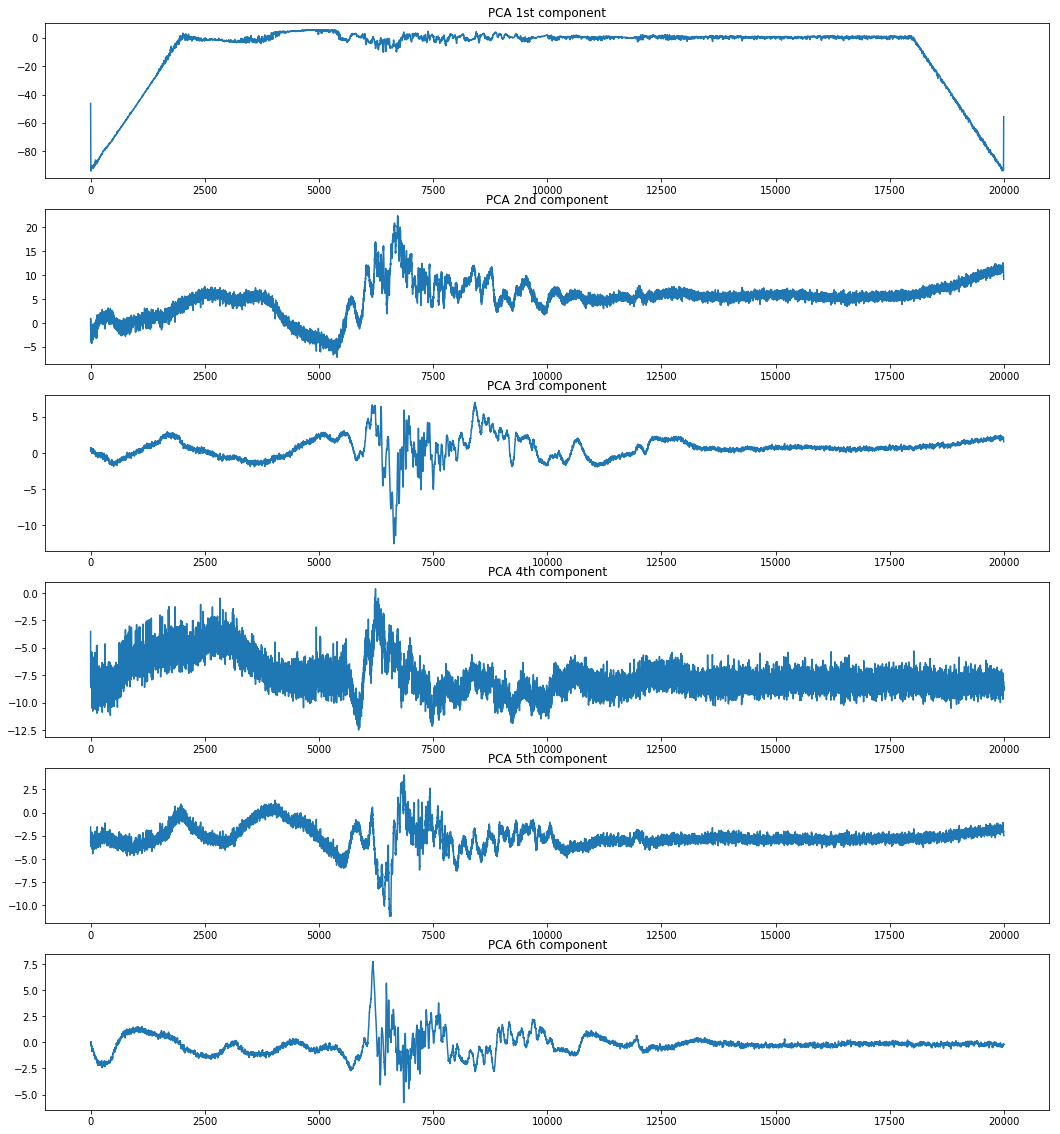

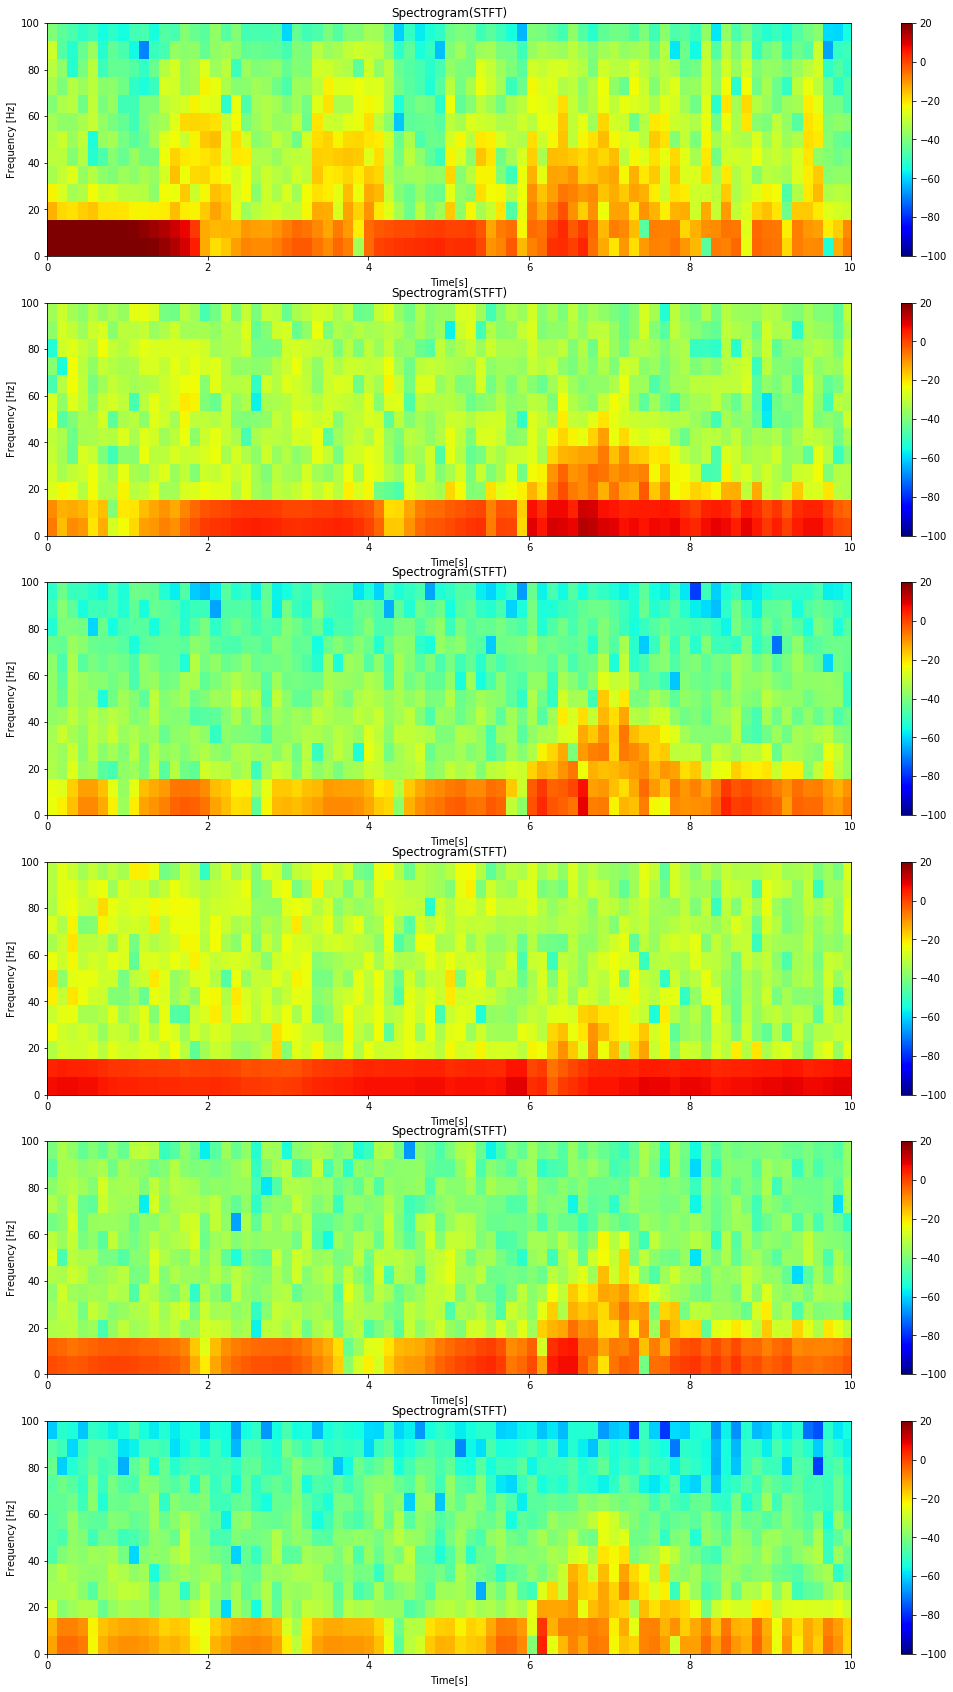

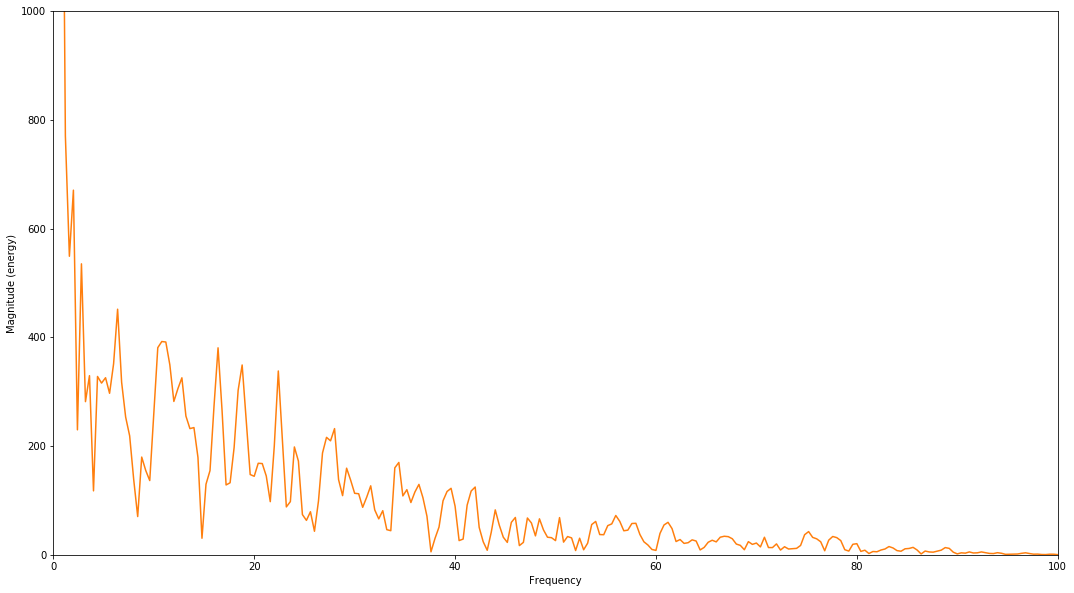

In [51]:
visualize(path1 = "170401_activity_data_UABC_L2_building_2_LOS\Input\input_fall_170316_1452_01.csv")

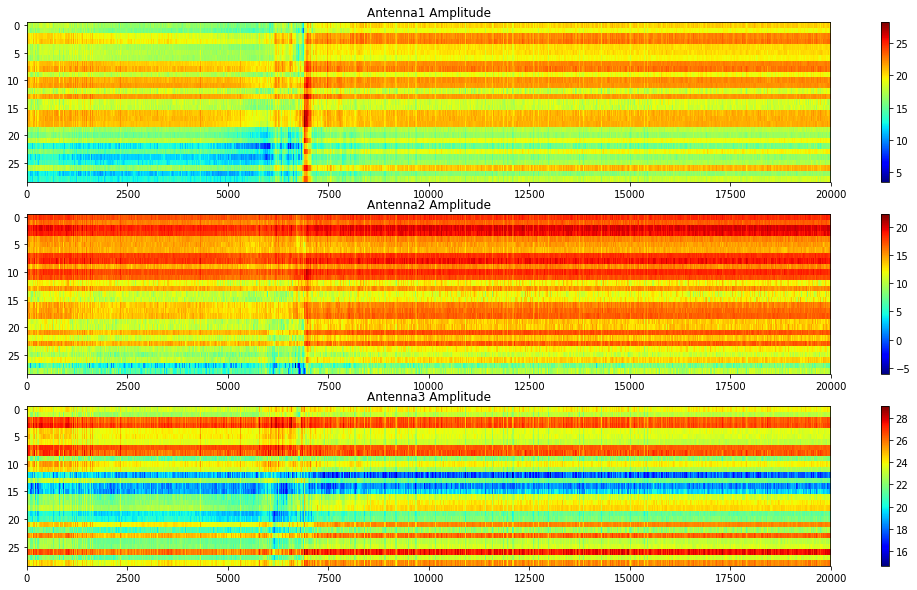

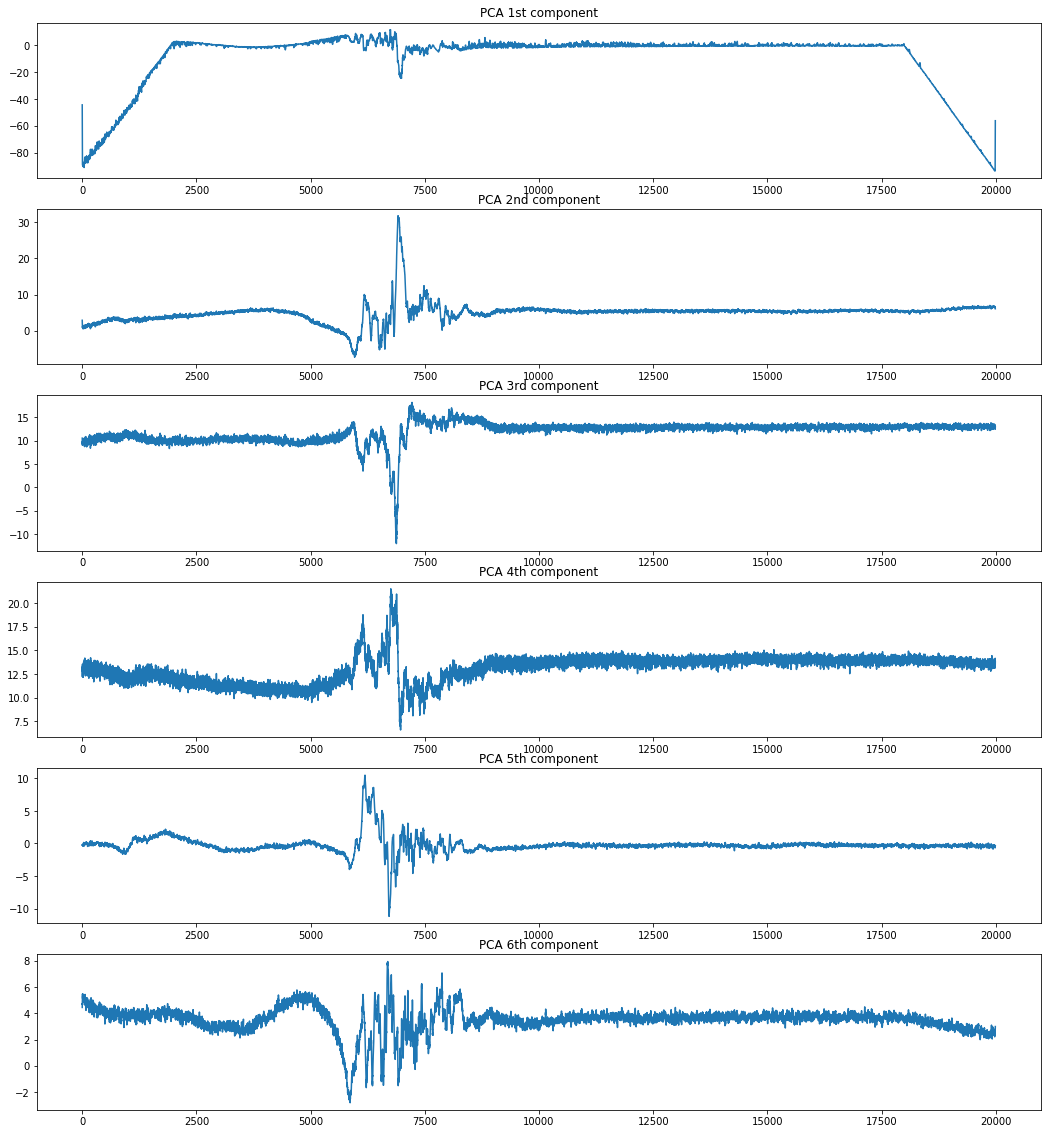

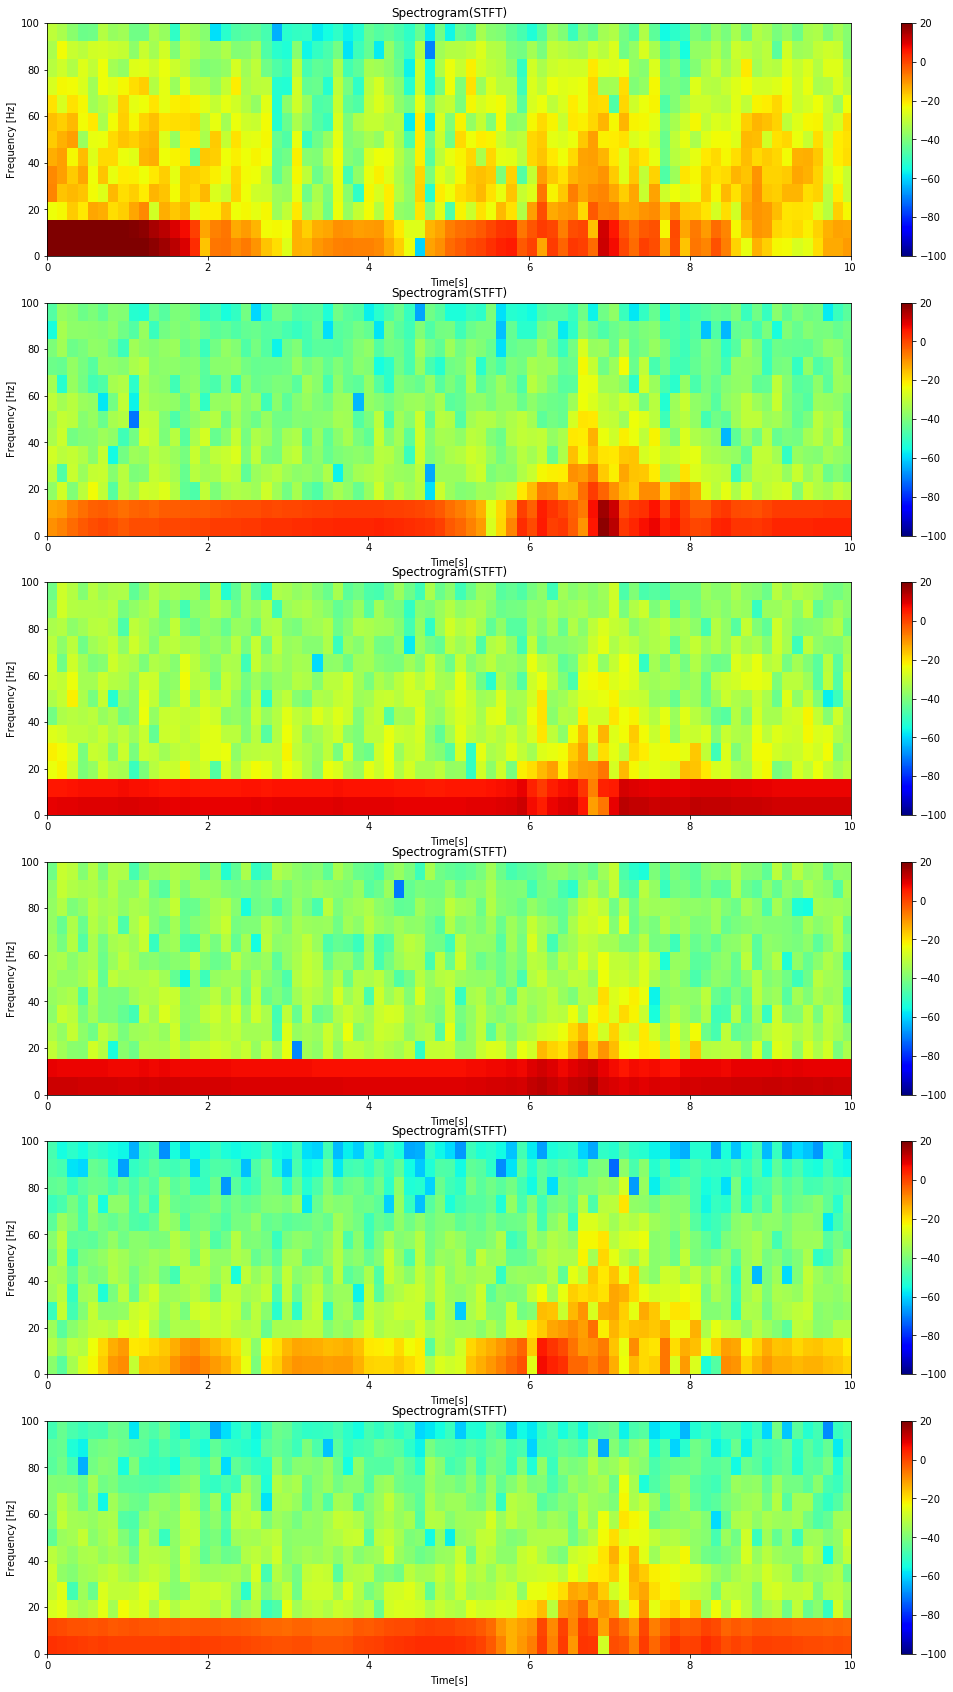

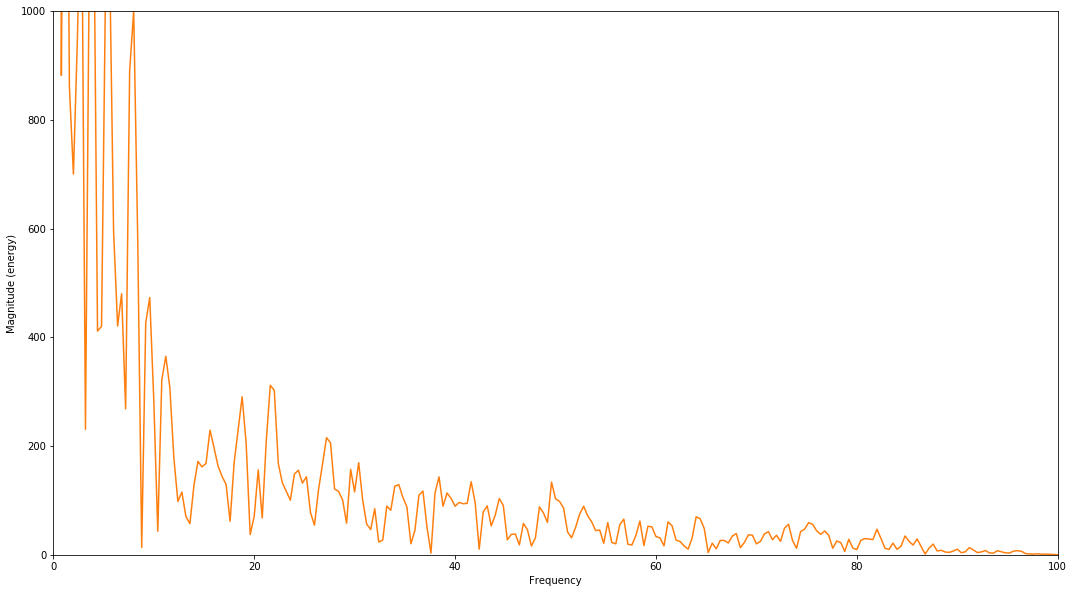

In [53]:
visualize(path1 = "161219_activity_data_Stanford_Gates_505_LOS\Input\input_161219_sankalp_fall_1.csv")

# Bed

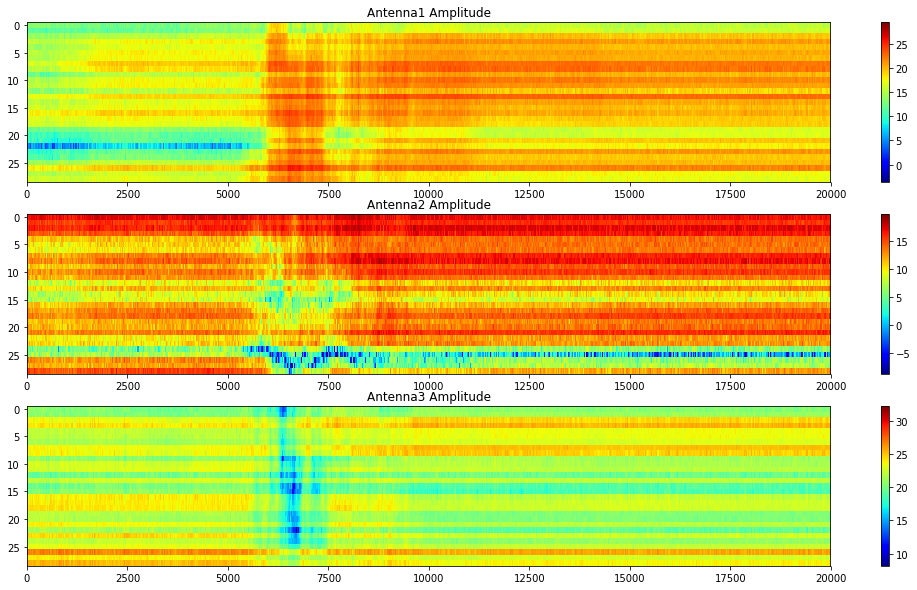

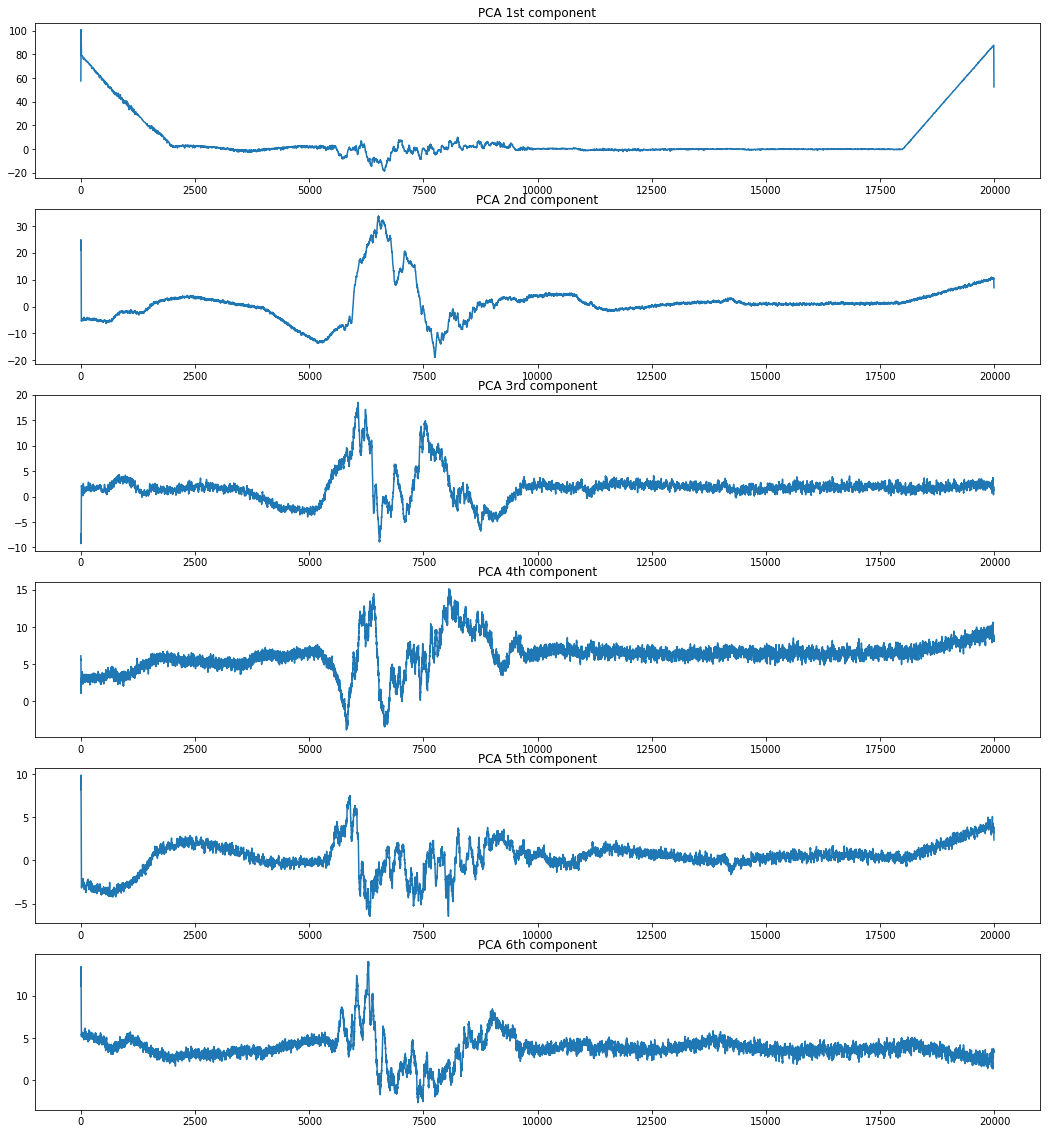

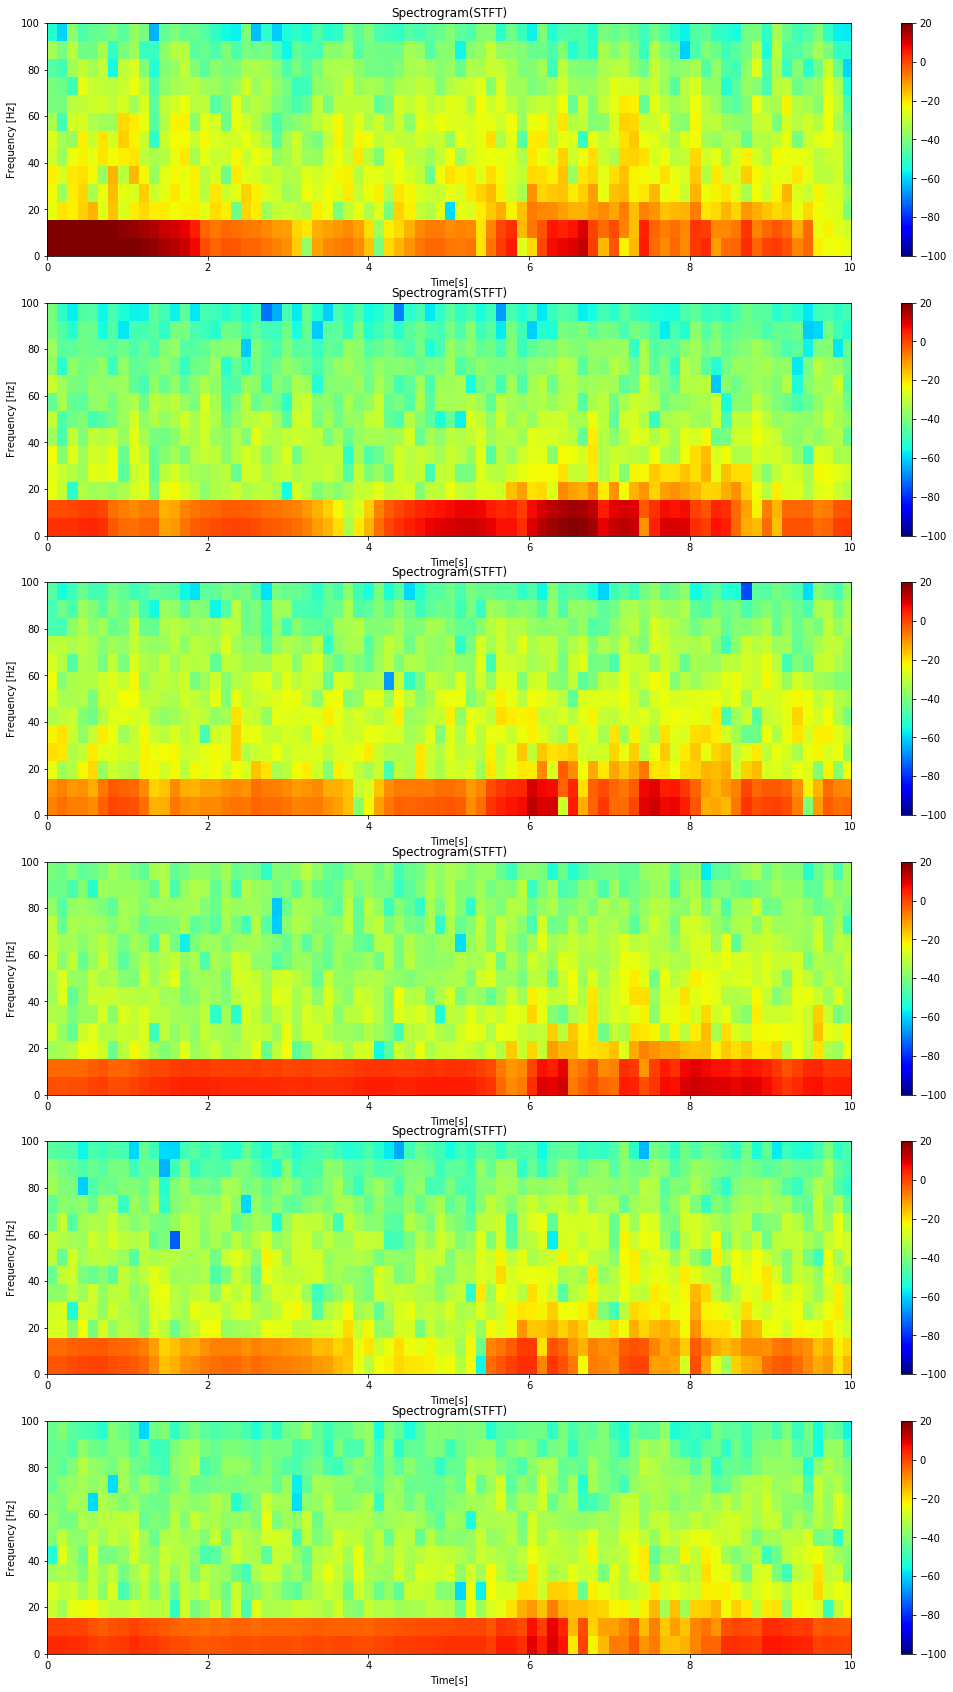

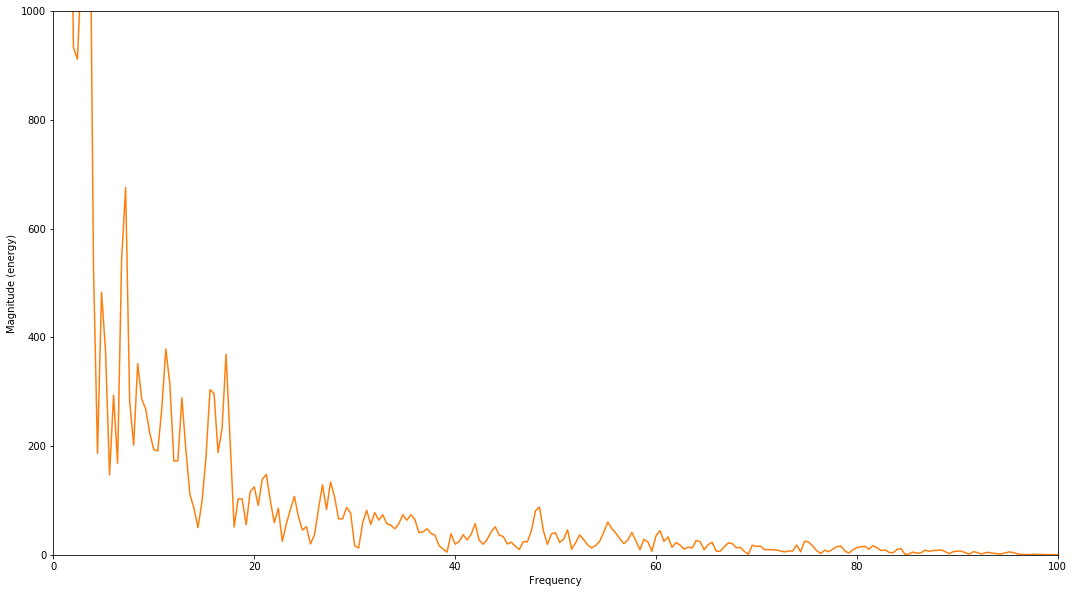

In [54]:
visualize(path1 = "161219_activity_data_Stanford_Gates_505_LOS\Input\input_161219_sankalp_bed_1.csv")